# Problem statement:
This dataset has total 13 columns and 14204 rows. Our task is to analyze the dataset and predict the expected sales of a bigmart store by developing a supervised machine learning model.

In [83]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PolynomialFeatures
from sklearn.svm import SVR
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score

In [84]:
#Load Data Set
train = pd.read_csv('bigdatamart_Train.csv')
test = pd.read_csv('bigdatamart_Test.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Analyzing the data:
Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.

In [39]:
# Join Train and Test Dataset
#Create source column to later separate the data easily
train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index = True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [40]:
data['Item_Weight'].isnull().sum()

2439

# Data Visualization:
Here we would try to find out a relation between each column of the final numerical dataset and the target attribute income. This can be achieved by creating a Bar graph between income and each of the other columns.

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

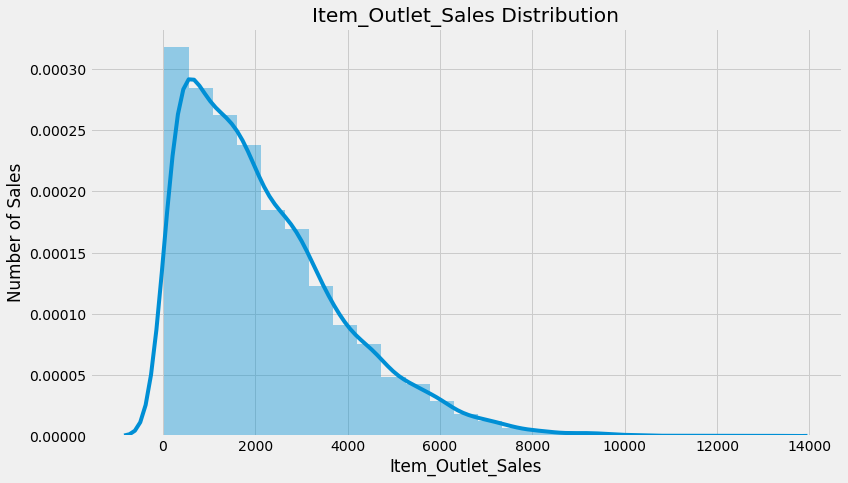

In [41]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")


In [42]:
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


In [43]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [44]:
corr =numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [45]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


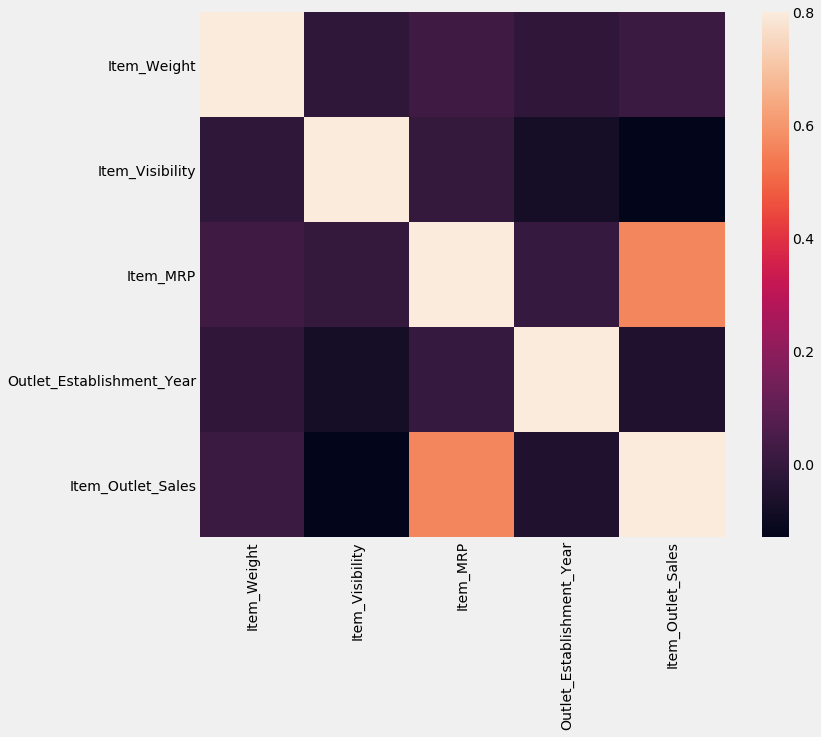

In [46]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

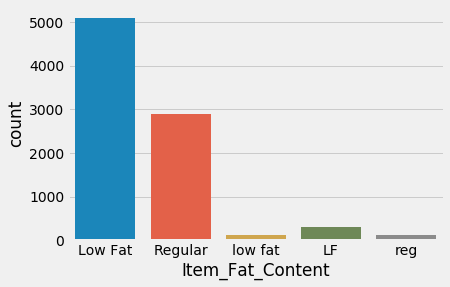

In [47]:
sns.countplot(train.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

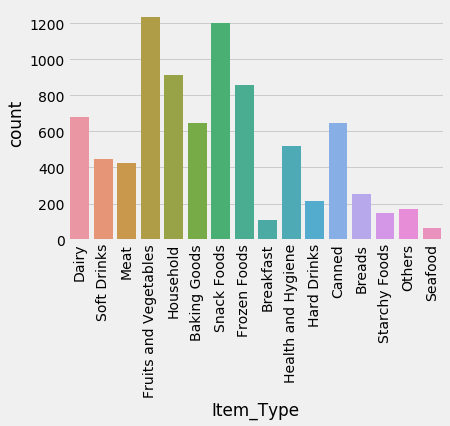

In [48]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

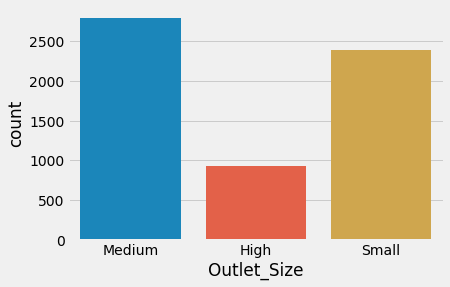

In [49]:
sns.countplot(train.Outlet_Size)

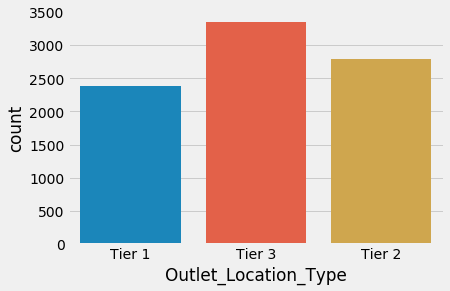

In [50]:
sns.countplot(train.Outlet_Location_Type)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

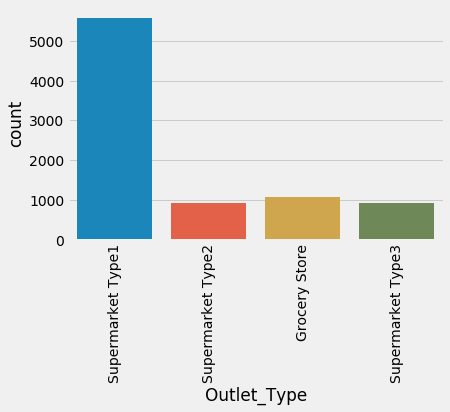

In [51]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

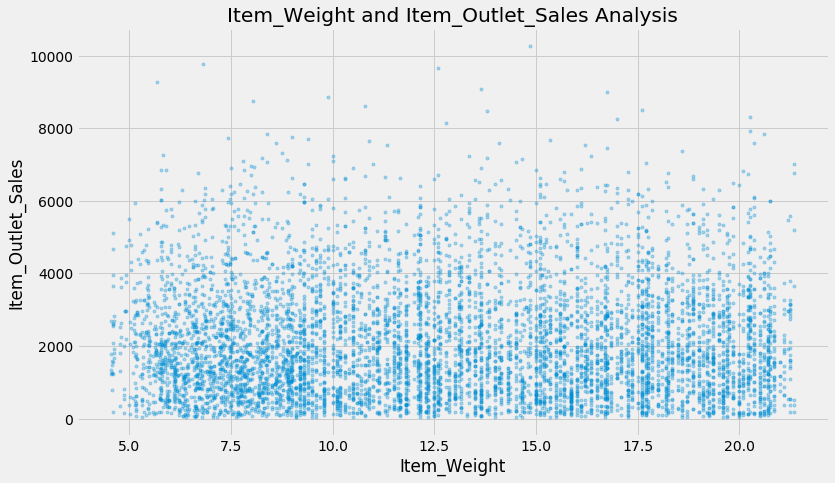

In [52]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

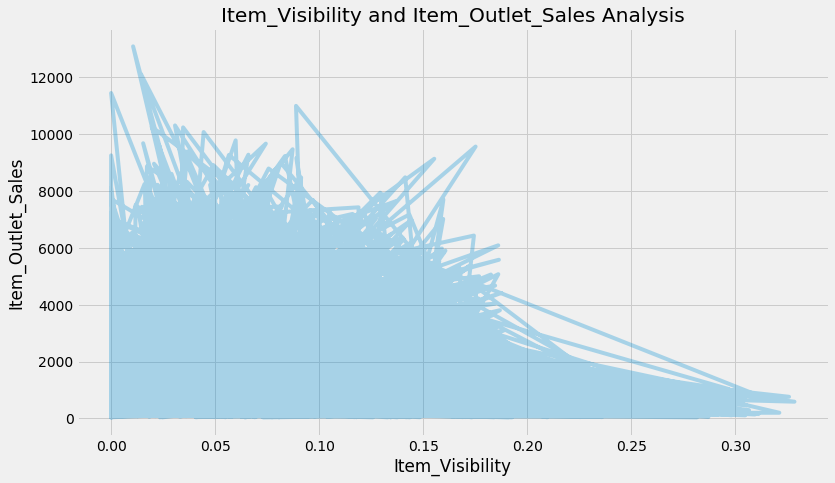

In [53]:

plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Visibility and Item_Outlet_Sales Analysis')
plt.plot(train.Item_Visibility, train['Item_Outlet_Sales'], alpha = 0.3)

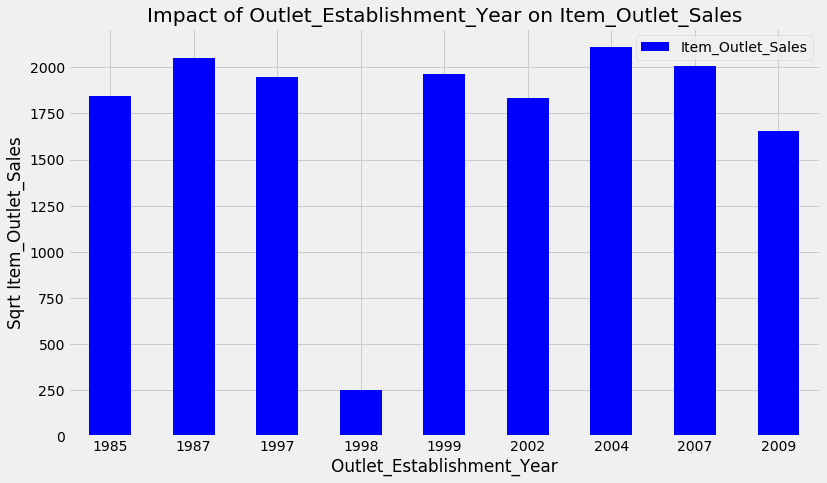

In [54]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

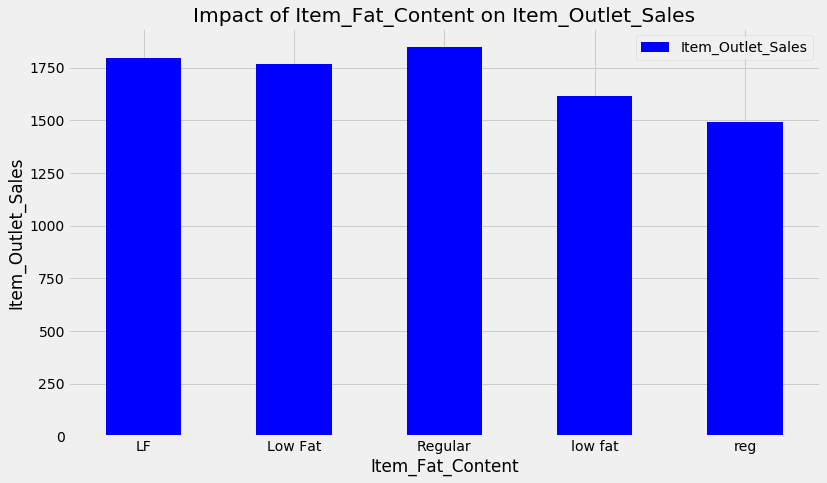

In [55]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

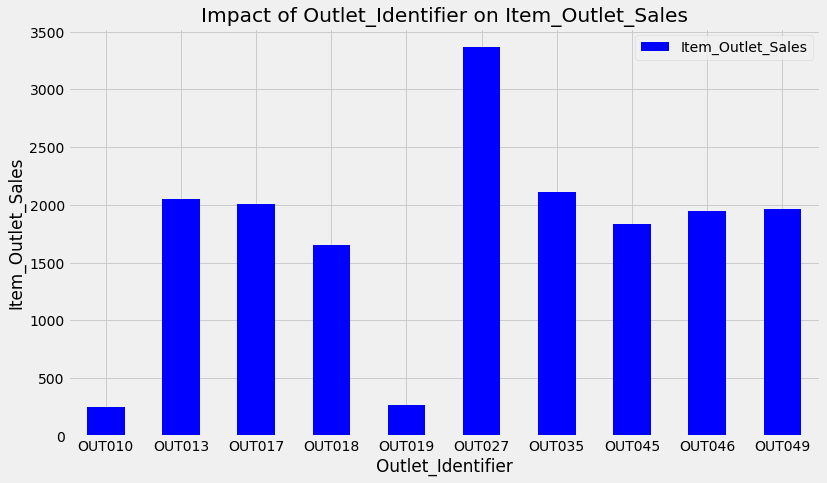

In [56]:
Outlet_Identifier_pivot = \
train.pivot_table(index='Outlet_Identifier', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Identifier on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

In [57]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [58]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


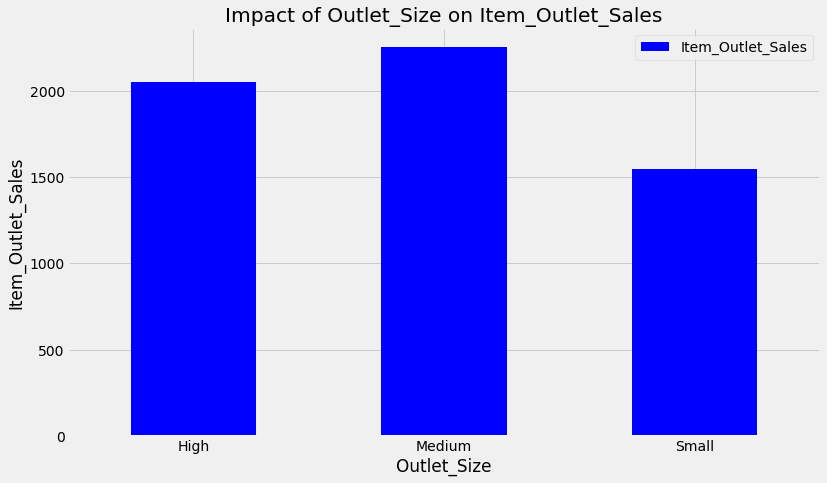

In [59]:
Outlet_Size_pivot = \
train.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Size on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

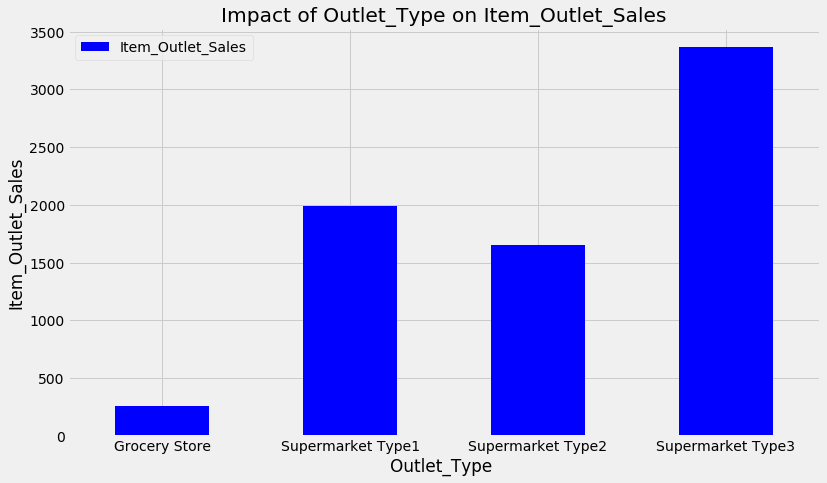

In [60]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [61]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


# Feature Engineering:
Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. the data provided in object column is Categorical data. we need to convert these into numerical notations. Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

In [62]:
data.fillna(data.mean(), inplace=True)

In [63]:
cat_columns=['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size',
             'Outlet_Location_Type','Outlet_Type','Item_Fat_Content','source']
for each in cat_columns:
    data[cat_columns] = data[cat_columns].astype('category')

In [64]:
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

In [65]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156,9.30,1,0.016047,4,249.8092,9,4,1,0,1,3735.1380,1
1,8,5.92,2,0.019278,14,48.2692,3,8,1,2,2,443.4228,1
2,662,17.50,1,0.016760,10,141.6180,9,4,1,0,1,2097.2700,1
3,1121,19.20,2,0.000000,6,182.0950,0,3,-1,2,0,732.3800,1
4,1297,8.93,1,0.000000,9,53.8614,1,1,0,2,1,994.7052,1


# Model Selection:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the sales of bigmart shope. This scenario is a classic example of linear Regression.

We are provided with 14204 rows of the labeled dataset tagged with the output column “Sales” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Regression problem. Based on these criteria we can narrow down our choice of models to a few:

Linear Regression

Random Forest

Poly nomial 

SVR()

# Identifying features:
Here we are dividing our data into a dependent feature that is object as df_y and independent features as df_x.

In [66]:
y = data["Item_Outlet_Sales"]
x = data.drop("Item_Outlet_Sales",axis=1)

In [67]:
x.drop("Item_Identifier",axis=1,inplace = True)
cols_to_norm = ['Item_Weight','Item_MRP']
x[cols_to_norm] = x[cols_to_norm].apply(lambda x: (x - x.min())/(x.max()-x.min())) 

In [68]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,0.282525,1,0.016047,4,0.927507,9,4,1,0,1,1
1,0.081274,2,0.019278,14,0.072068,3,8,1,2,2,1
2,0.770765,1,0.016760,10,0.468288,9,4,1,0,1,1
3,0.871986,2,0.000000,6,0.640093,0,3,-1,2,0,1
4,0.260494,1,0.000000,9,0.095805,1,1,0,2,1,1


In [69]:
y = (y - y.min())/(y.max()-y.min())

# Splitting Data:
we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.40 creates a test data set with 30% of the data we have and the remaining 60% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=45)

In [71]:
regressor_multi = LinearRegression()
regressor_multi.fit(x_train,y_train)

accuracy = cross_val_score(estimator=regressor_multi, X=x_train, y=y_train,cv=10)
print(f"the accuracy of the multi-linear regressor model is \t {accuracy.mean()}")
print(f"the deviation in the accuracy is \t {accuracy.std()}")
pred = regressor_multi.predict(x_test)

mse = mean_squared_error(y_test,pred)
print('mean square error of multi-linear regression is :',mse)
print('root mean square error of multi-regressor is :',math.sqrt(mse))


the accuracy of the multi-linear regressor model is 	 0.3174592166250499
the deviation in the accuracy is 	 0.02264486698372669
mean square error of multi-linear regression is : 0.007210186128361984
root mean square error of multi-regressor is : 0.08491281486537815


In [72]:
regressor_random = RandomForestRegressor(n_estimators=100)
regressor_random.fit(x_train,y_train)

accuracy = cross_val_score(estimator=regressor_random, X=x_train, y=y_train,cv=10)
print(f"the accuracy of the Random Forest model is \t {accuracy.mean()}")
print(f"the deviation in the accuracy is \t {accuracy.std()}")
pred = regressor_random.predict(x_test)

mse = mean_squared_error(y_test,pred)
print('mean square error of Random Forst Model is :',mse)
print('root mean square error of Random Forest Model is :',math.sqrt(mse))


the accuracy of the Random Forest model is 	 0.5726174246902681
the deviation in the accuracy is 	 0.03141494206763095
mean square error of Random Forst Model is : 0.004704747698351766
root mean square error of Random Forest Model is : 0.06859116341302111


In [73]:
poly_reg = PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x_train)
regressor_poly = LinearRegression()
regressor_poly.fit(x_poly,y_train)


accuracy = cross_val_score(estimator=regressor_poly, X=x_train, y=y_train,cv=10)
print(f"the accuracy of the Random Forest model is \t {accuracy.mean()}")
print(f"the deviation in the accuracy is \t {accuracy.std()}")
pred = regressor_random.predict(x_test)

mse = mean_squared_error(y_test,pred)
print('mean square error of Random Forst Model is :',mse)
print('root mean square error of Random Forest Model is :',math.sqrt(mse))


the accuracy of the Random Forest model is 	 0.3174592166250499
the deviation in the accuracy is 	 0.02264486698372669
mean square error of Random Forst Model is : 0.004704747698351766
root mean square error of Random Forest Model is : 0.06859116341302111


In [74]:
model = SVR()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = cross_val_score(estimator=model, X=x_train, y=y_train,cv=10)
print(max(accuracy))
print(mean_squared_error(y_test,y_pred))
print('root mean square error of Random Forest Model is :',math.sqrt(mean_squared_error(y_test,y_pred)))


0.47420050234815186
0.006166031598524961
root mean square error of Random Forest Model is : 0.07852408292062353


# we can observe that all algorithem worked very well.
Accuracy score of all algorithems are as given:-

Accuracy score of Linear Regression is 31%

Accuracy score of Random Forest is 57%

Accuracy score of Poly nomial is 31%

Accuracy score of SVR() is 47%

Hence we can say that out all algorithems Random Forest is best for this problem till now.


# Save the model using Pickle

In [81]:
# Save the model using pickle
import pickle

filename = "pickleregressor_randomfile.pkl"
pickle.dump(regressor_random, open(filename, 'wb'))


In [82]:
# predict using the saved model by pickle


loaded_model = pickle.load(open("pickleregressor_randomfile.pkl", 'rb'))

loaded_model.predict(x_test)

array([0.4424467 , 0.18183532, 0.16455128, ..., 0.16455128, 0.22475518,
       0.11070514])